In [2]:
cd  /content

/content


In [3]:
json_path = "Colab\ Notebooks/kaggle.json"
!cp /content/drive/MyDrive/{json_path} /content/

In [4]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions list

ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2    2025-04-01 23:59:00  Featured         2,117,152 Usd       1733           False  
https://www.kaggle.com/competitions/konwinski-prize                              2025-03-12 23:59:00  Featured         1,225,000 Usd        482           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding                      2025-05-29 23:59:00  Featured            75,000 Usd        163           False  
https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions         2025-03-05 23:59:41  Research            50,000 Usd       3283           False  
https://www.kaggle.com/compe

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pwd

'/content'

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/gender_submission.csv")

In [ ]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data = pd.concat([train, test], sort=False)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
print(len(train), len(test), len(data))

891 418 1309


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1])

<ipython-input-16-39335a3ab58d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1])


In [1]:
data['Sex'].value_counts()

NameError: name 'data' is not defined

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Embarked'].value_counts()

,count
Embarked,
0,916
1,270
2,123


In [ ]:
data['Fare'] = data['Fare'].fillna(np.mean(data['Fare']))

In [ ]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()

# data['Age'] = data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std))

data['Age'] = data['Age'].fillna(age_std)

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.355997,26.773429,0.498854,0.385027,33.295479,0.394194
std,378.020061,0.486592,0.837836,0.478997,14.297451,1.041658,0.865560,51.738879,0.653499
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,14.413493,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data = data.drop(delete_columns, axis=1)

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [ ]:
train = data[:len(train)]
test = data[len(train):]

In [ ]:
y_train = train['Survived']
X_train = train.drop('Survived', axis = 1)
X_test = test.drop('Survived', axis = 1)

In [ ]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [ ]:
y_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [ ]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,34.5,7.8292,2
1,3,1,47.0,7.0000,0
2,2,0,62.0,9.6875,2
3,3,0,27.0,8.6625,0
4,3,1,22.0,12.2875,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='sag')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
sub = gender_submission
sub['Survived'] = list(map(int, y_pred))

In [ ]:
sub.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submissions titanic

fileName               date                 description                                            status    publicScore  privateScore  
---------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
gender_submission.csv  2025-02-11 14:36:19  250211_gender                                          complete  0.76555                    
submission.csv         2025-02-11 14:28:32  250211                                                 complete  0.66028                    
submission.csv         2024-08-11 14:13:34  Notebook python-kaggle-start-book-ch02_01 | Version 2  complete  0.66028                    
submission.csv         2024-06-09 15:15:28                                                         complete  0.77511                    


# family

In [5]:
import pandas as pd
import numpy as np
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/gender_submission.csv")

data = pd.concat([train, test], sort=False)

# data['Sex'] = data['Sex'].replace(['male','female'], [0, 1]).astype(int)
# data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1]).astype(object).astype(int)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)
data['Embarked'] = data['Embarked'].fillna(('S'))
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Fare'] = data['Fare'].fillna(np.mean(data['Fare']))
data['Age'] = data['Age'].fillna(data['Age'].median())

In [6]:
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]

<Axes: xlabel='FamilySize', ylabel='count'>

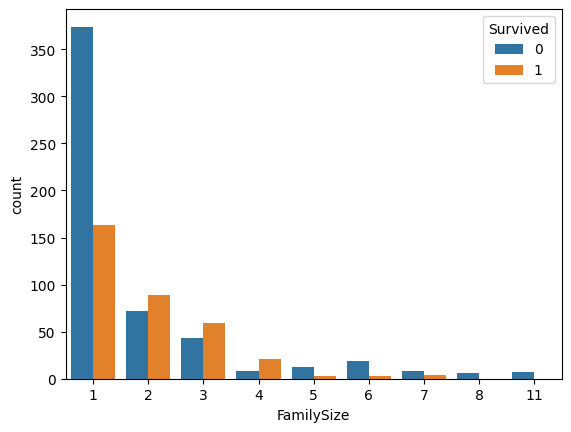

In [7]:
import seaborn  as sns
sns.countplot(x='FamilySize', data=train, hue='Survived')

In [ ]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

In [ ]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,0.0,3,0,22.0,7.2500,0,2,0
1,1.0,1,1,38.0,71.2833,1,2,0
2,1.0,3,1,26.0,7.9250,0,1,1
3,1.0,1,1,35.0,53.1000,0,2,0
4,0.0,3,0,35.0,8.0500,0,1,1


In [ ]:
sub = gender_submission
sub

clf.fit(X_train, y_train)
y_pred_familysize_isalone = clf.predict(X_test)
sub['Survived'] = list(map(int, y_pred_familysize_isalone))
sub.head()

sub.to_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/submission_familysize_isalone.csv", index=False)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
clf.fit(X_train.drop('FamilySize', axis=1), y_train)
y_pred_isalone = clf.predict(X_test.drop('FamilySize', axis=1))
sub['Survived'] = list(map(int, y_pred_isalone))
sub.to_csv("submission_isalone.csv", index = False)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
clf.fit(X_train.drop('IsAlone', axis=1), y_train)
y_pred_familysize = clf.predict(X_test.drop('IsAlone', axis=1))

sub['Survived'] = list(map(int, y_pred_familysize))
sub.to_csv("submission_familysize.csv", index = False)

sub.head()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
!kaggle competitions submit -f ./"submission_familysize.csv" -m "250216_fam" titanic

100% 2.77k/2.77k [00:00<00:00, 7.77kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [ ]:
!kaggle competitions submit -f ./"submission_isalone.csv" -m "250216_alone" titanic

100% 2.77k/2.77k [00:00<00:00, 8.01kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [ ]:
!kaggle competitions submit -f ./"submission_familysize_isalone.csv" -m "250216_fam_alone" titanic

100% 2.77k/2.77k [00:00<00:00, 8.28kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [ ]:
!kaggle competitions submissions titanic

fileName                           date                 description                                            status    publicScore  privateScore  
---------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_familysize_isalone.csv  2025-02-16 14:32:50  250216_fam_alone                                       complete  0.65550                    
submission_familysize_isalone.csv  2025-02-16 14:30:26  250216_fam_alone                                       error                                
submission_familysize_isalone.csv  2025-02-16 14:27:31  250216_fam_alone                                       error                                
submission_isalone.csv             2025-02-16 14:23:08  250216_alone                                           complete  0.66507                    
submission_familysize.csv          2025-02-16 14:22:41  250216_fam                                        

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic'

# Random Forest


In [9]:
import numpy as np
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/gender_submission.csv")

data = pd.concat([train, test], sort=False)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)
data['Embarked'] = data['Embarked'].fillna(('S'))
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Fare'] = data['Fare'].fillna(np.mean(data['Fare']))
data['Age'] = data['Age'].fillna(data['Age'].median())
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [11]:
delete_columns = ['Name', 'PassengerId','Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [12]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,1,0,7.2500,0,2,0
1,1,1,38.0,1,0,71.2833,1,2,0
2,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,35.0,1,0,53.1000,0,2,0
4,3,0,35.0,0,0,8.0500,0,1,1


In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', solver="sag", random_state=0)

In [14]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred[:10]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [16]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
y_pred[:10]

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0.])

In [18]:
sub = gender_submission

In [19]:
sub['Survived'] = list(map(int, y_pred))
sub.to_csv("submission_randomforest.csv", index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [32]:
cd /content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic

/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic


In [39]:
!kaggle competitions submit -f "submission_randomforest.csv" -m random_250224 titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle competitions submissions titanic

fileName                           date                 description                                            status    publicScore  privateScore  
---------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_randomforest.csv        2025-02-24 13:34:47  random_250224                                          complete  0.77272                    
submission_randomforest.csv        2025-02-17 14:14:19  250216_randomforest                                    complete  0.77272                    
submission_familysize_isalone.csv  2025-02-16 14:32:50  250216_fam_alone                                       complete  0.65550                    
submission_familysize_isalone.csv  2025-02-16 14:30:26  250216_fam_alone                                       error                                
submission_familysize_isalone.csv  2025-02-16 14:27:31  250216_fam_alone                                  

# LightGBM

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [ ]:
!pip install dask[dataframe]

In [30]:
import lightgbm as lgb
categorical_features = ['Embarked', 'Pclass', 'Sex']
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

params = {
    'objective': 'binary'
}

model = lgb.train(
    params, lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    # verbose_eval=10,
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

[LightGBM] [Info] Number of positive: 167, number of negative: 269
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383028 -> initscore=-0.476718
[LightGBM] [Info] Start training from score -0.476718
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [31]:
y_pred = (y_pred > 0.5).astype(int)

In [34]:
y_pred[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [53]:
sub['Survived'] = y_pred
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [54]:
sub.to_csv("submission_lightgbm.csv", index=False)

In [55]:
!kaggle competitions submit -f "submission_lightgbm.csv" -m "lightgbm_250224" titanic

100% 2.77k/2.77k [00:00<00:00, 10.5kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [6]:
!kaggle competitions submissions titanic

fileName                           date                 description                                            status    publicScore  privateScore  
---------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_lightgbm.csv            2025-03-02 13:01:34  lightgbm_250224                                        complete  0.77272                    
submission_lightgbm.csv            2025-03-02 13:01:05  lightgbm_250224                                        complete  0.37799                    
submission_randomforest.csv        2025-02-24 13:34:47  random_250224                                          complete  0.77272                    
submission_randomforest.csv        2025-02-17 14:14:19  250216_randomforest                                    complete  0.77272                    
submission_familysize_isalone.csv  2025-02-16 14:32:50  250216_fam_alone                                  

In [7]:
import numpy as np
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/gender_submission.csv")

data = pd.concat([train, test], sort=False)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)
data['Embarked'] = data['Embarked'].fillna(('S'))
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Fare'] = data['Fare'].fillna(np.mean(data['Fare']))
data['Age'] = data['Age'].fillna(data['Age'].median())
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [9]:
delete_columns = ['Name', 'PassengerId', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [11]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,1,0,7.2500,0,2,0
1,1,1,38.0,1,0,71.2833,1,2,0
2,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,35.0,1,0,53.1000,0,2,0
4,3,0,35.0,0,0,8.0500,0,1,1


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [69]:
categorical_features = ['Embarked', 'Pclass', 'Sex']

In [70]:
params = {
    'objective': 'binary'
}

In [71]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)
verbose_eval=10

model = lgb.train(
    params, lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=10,
                    verbose=True), # early_stopping用コールバック関数
                lgb.log_evaluation(verbose_eval)] # コ
)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Info] Number of positive: 2, number of negative: 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [72]:
y_pred

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

In [58]:
params = {
    'objective': 'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

In [59]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)
verbose_eval=10

model = lgb.train(
    params, lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=10,
                    verbose=True), # early_stopping用コールバック関数
                lgb.log_evaluation(verbose_eval)] # コ
)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Info] Number of positive: 3, number of negative: 4
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 7, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.428571 -> initscore=-0.287682
[LightGBM] [Info] Start training from score -0.287682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits 

In [60]:
y_pred[:10]

array([0.42857143, 0.42857143, 0.42857143, 0.42857143, 0.42857143,
       0.42857143, 0.42857143, 0.42857143, 0.42857143, 0.42857143])

In [73]:
y_pred = (y_pred > 0.5).astype(int)

In [74]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
sub = gender_submission

sub.to_csv("submission_lightgbm_handtuning.csv", index=False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [77]:
!kaggle competitions submit -f "/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/submission_lightgbm_handtuning2.csv" -m 250303_lightgbm_handtuning2 titanic

100% 2.77k/2.77k [00:00<00:00, 15.9kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [78]:
!kaggle competitions submissions titanic

fileName                             date                 description                                            status    publicScore  privateScore  
-----------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_lightgbm_handtuning2.csv  2025-03-03 13:55:30  250303_lightgbm_handtuning2                            complete  0.76555                    
submission_lightgbm_handtuning.csv   2025-03-03 13:55:22  250303_lightgbm_handtuning                             complete  0.76555                    
submission_lightgbm_handtuning.csv   2025-03-03 13:52:58  250303_lightgbm_handtuning                             complete  0.76555                    
submission_lightgbm.csv              2025-03-02 13:01:34  lightgbm_250224                                        complete  0.77272                    
submission_lightgbm.csv              2025-03-02 13:01:05  lightgbm_250224                     

In [81]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.0 MB/s eta 0:00:00


In [92]:
import optuna
from sklearn.metrics import log_loss

def objective(trial):
    params = {
        'objective': 'binary',
        'max_bin': trial.suggest_int('max_bin', 255, 500),
        'learning_rate': 0.05,
        'num_leaves': trial.suggest_int('num_leaves', 32, 128),
    }

    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

    model = lgb.train(
        params, lgb_train,
        valid_sets=[lgb_train, lgb_eval],
        num_boost_round=1000,
        callbacks=[lgb.early_stopping(stopping_rounds=10,
                        verbose=True), # early_stopping用コールバック関数
                    lgb.log_evaluation(verbose_eval)] # コ
    )

    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    score = log_loss(y_valid, y_pred_valid)
    return score

In [93]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=0))
study.optimize(objective, n_trials=40)

[I 2025-03-03 14:03:07,738] A new study created in memory with name: no-name-f8c3cba0-2dca-45eb-8deb-9509630f8f3a
[I 2025-03-03 14:03:07,765] Trial 0 finished with value: 0.6931471805599453 and parameters: {'max_bin': 390, 'num_leaves': 101}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:07,778] Trial 1 finished with value: 0.6931471805599453 and parameters: {'max_bin': 403, 'num_leaves': 84}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:07,792] Trial 2 finished with value: 0.6931471805599453 and parameters: {'max_bin': 359, 'num_leaves': 94}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:07,804] Trial 3 finished with value: 0.6931471805599453 and parameters: {'max_bin': 362, 'num_leaves': 118}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:07,818] Trial 4 finished with value: 0.6931471805599453 and parameters: {'max_bin': 492, 'num_leaves': 69}. Best is trial 0 with value: 0.6931471805599453.
[I 2

[LightGBM] [Info] Number of positive: 2, number of negative: 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[I 2025-03-03 14:03:08,135] Trial 9 finished with value: 0.6931471805599453 and parameters: {'max_bin': 446, 'num_leaves': 116}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,149] Trial 10 finished with value: 0.6931471805599453 and parameters: {'max_bin': 495, 'num_leaves': 109}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,162] Trial 11 finished with value: 0.6931471805599453 and parameters: {'max_bin': 368, 'num_leaves': 107}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,174] Trial 12 finished with value: 0.6931471805599453 and parameters: {'max_bin': 284, 'num_leaves': 94}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,186] Trial 13 finished with value: 0.6931471805599453 and parameters: {'max_bin': 290, 'num_leaves': 123}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,199] Trial 14 finished with value: 0.6931471805599453 and parameters: {'max_bin': 383, 'n

[LightGBM] [Info] Number of positive: 2, number of negative: 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[I 2025-03-03 14:03:08,356] Trial 26 finished with value: 0.6931471805599453 and parameters: {'max_bin': 498, 'num_leaves': 41}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,375] Trial 27 finished with value: 0.6931471805599453 and parameters: {'max_bin': 306, 'num_leaves': 47}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,404] Trial 28 finished with value: 0.6931471805599453 and parameters: {'max_bin': 415, 'num_leaves': 56}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,415] Trial 29 finished with value: 0.6931471805599453 and parameters: {'max_bin': 369, 'num_leaves': 55}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,429] Trial 30 finished with value: 0.6931471805599453 and parameters: {'max_bin': 294, 'num_leaves': 42}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,450] Trial 31 finished with value: 0.6931471805599453 and parameters: {'max_bin': 416, 'num_

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[I 2025-03-03 14:03:08,574] Trial 38 finished with value: 0.6931471805599453 and parameters: {'max_bin': 324, 'num_leaves': 43}. Best is trial 0 with value: 0.6931471805599453.
[I 2025-03-03 14:03:08,596] Trial 39 finished with value: 0.6931471805599453 and parameters: {'max_bin': 327, 'num_leaves': 43}. Best is trial 0 with value: 0.6931471805599453.


[LightGBM] [Info] Number of positive: 2, number of negative: 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 4, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [94]:
y_pred = (y_pred > 0.5).astype(int)

sub['Survived'] = y_pred
sub.to_csv("submission_lightgbm_optuna3.csv", index=False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [96]:
!kaggle competitions submit -f "/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/submission_lightgbm_optuna3.csv" -m 250303_lightgbm_optuna titanic

100% 2.77k/2.77k [00:00<00:00, 15.6kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [97]:
!kaggle competitions submissions titanic

fileName                             date                 description                                            status    publicScore  privateScore  
-----------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_lightgbm_optuna3.csv      2025-03-03 14:09:04  250303_lightgbm_optuna                                 complete  0.62200                    
submission_lightgbm_handtuning2.csv  2025-03-03 13:55:30  250303_lightgbm_handtuning2                            complete  0.76555                    
submission_lightgbm_handtuning.csv   2025-03-03 13:55:22  250303_lightgbm_handtuning                             complete  0.76555                    
submission_lightgbm_handtuning.csv   2025-03-03 13:52:58  250303_lightgbm_handtuning                             complete  0.76555                    
submission_lightgbm.csv              2025-03-02 13:01:34  lightgbm_250224                     

In [1]:
cd  /content

/content


In [2]:
json_path = "Colab\ Notebooks/kaggle.json"
!cp /content/drive/MyDrive/{json_path} /content/

In [3]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
import numpy as np
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/gender_submission.csv")

data = pd.concat([train, test], sort=False)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)
data['Embarked'] = data['Embarked'].fillna(('S'))
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Fare'] = data['Fare'].fillna(np.mean(data['Fare']))
data['Age'] = data['Age'].fillna(data['Age'].median())
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,1


In [6]:
delete_columns = ['Name', 'PassengerId', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [7]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,1,0,7.2500,0,2,0
1,1,1,38.0,1,0,71.2833,1,2,0
2,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,35.0,1,0,53.1000,0,2,0
4,3,0,35.0,0,0,8.0500,0,1,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [9]:
categorical_features = ['Embarked', 'Pclass', 'Sex']

In [10]:
params = {
    'objective': 'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

In [14]:
import lightgbm as lgb


lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)
verbose_eval = 10

model = lgb.train(
    params, lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=10,
                    verbose=True), # early_stopping用コールバック関数
                lgb.log_evaluation(verbose_eval)] # コ
)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Info] Number of positive: 239, number of negative: 384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383628 -> initscore=-0.474179
[LightGBM] [Info] Start training from score -0.474179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [18]:
y_pred[:10]

array([0.03935242, 0.52380086, 0.11487096, 0.07538967, 0.39761111,
       0.41886672, 0.7023978 , 0.13190461, 0.74563405, 0.0485806 ])

In [19]:
y_pred = (y_pred > 0.5).astype(int)

In [20]:
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [35]:
sub = gender_submission

sub['Survived'] = y_pred
sub.to_csv("submission_lightgbm_holdout.csv", index=False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [41]:
import numpy as np
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/test.csv")
gender_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/gender_submission.csv")

data = pd.concat([train, test], sort=False)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1}).astype(int)
data['Embarked'] = data['Embarked'].fillna(('S'))
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Fare'] = data['Fare'].fillna(np.mean(data['Fare']))
data['Age'] = data['Age'].fillna(data['Age'].median())
data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

delete_columns = ['Name', 'PassengerId', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,1,0,7.2500,0,2,0
1,1,1,38.0,1,0,71.2833,1,2,0
2,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,35.0,1,0,53.1000,0,2,0
4,3,0,35.0,0,0,8.0500,0,1,1


In [45]:
from sklearn.model_selection import KFold


y_preds = []
models = []
oof_train = np.zeros((len(X_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)

categorical_features = ['Embarked', 'Pclass', 'Sex']

params = {
    'objective': 'binary',
    'max_bin': 300,
    'learning_rate': 0.05,
    'num_leaves': 40
}

for fold_id, (train_index, valid_index) in enumerate(cv.split(X_train)):
    X_tr = X_train.loc[train_index, :]
    X_val = X_train.loc[valid_index, :]
    y_tr = y_train[train_index]
    y_val = y_train[valid_index]

    lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train, categorical_feature=categorical_features)
    verbose_eval = 10

    model = lgb.train(
        params, lgb_train,
        valid_sets=[lgb_train, lgb_eval],
        num_boost_round=1000,
        callbacks=[lgb.early_stopping(stopping_rounds=10,
                verbose=True), # early_stopping用コールバック関数
            lgb.log_evaluation(verbose_eval)] # コ
    )

    oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)

    y_preds.append(y_pred)
    models.append(model)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [52]:
oof_train

array([0.12651404, 0.97121865, 0.35483357, 0.98416798, 0.15282101,
       0.15451226, 0.12860577, 0.43270028, 0.53400538, 0.94629914,
       0.73588356, 0.93256267, 0.13364761, 0.08342474, 0.78077079,
       0.84213389, 0.29211498, 0.0785243 , 0.65297359, 0.61188265,
       0.07032062, 0.09024556, 0.54207029, 0.27276805, 0.31602608,
       0.12645544, 0.15300406, 0.07115979, 0.62460399, 0.0405634 ,
       0.5133878 , 0.94348883, 0.63155627, 0.15777342, 0.37479872,
       0.53367733, 0.09490146, 0.10540125, 0.51678136, 0.62920706,
       0.22390257, 0.9431111 , 0.26384485, 0.92139985, 0.73684208,
       0.05948491, 0.10564788, 0.63155627, 0.2820241 , 0.63243644,
       0.13343491, 0.21224439, 0.96681609, 0.94307269, 0.56040177,
       0.17985652, 0.88110361, 0.09955976, 0.87341445, 0.08017151,
       0.25281907, 0.95541259, 0.38849043, 0.43270028, 0.46621153,
       0.34609858, 0.91245556, 0.30113336, 0.28035787, 0.10450914,
       0.20940224, 0.13198083, 0.32306854, 0.09382494, 0.60185

In [53]:
pd.DataFrame(oof_train).to_csv('oof_train_kfold.csv', index=False)

scores = [
    m.best_score['valid_1']['binary_logloss'] for m in models
]
score = sum(scores) / len(scores)
print('===CV scores===')
print(scores)
print(score)

===CV scores===
[0.3687932995734066, 0.43982467718089535, 0.37133848188218943, 0.4304457066410965, 0.43213801149352893]
0.4085080353542233


In [54]:
from sklearn.metrics import accuracy_score


y_pred_oof = (oof_train > 0.5).astype(int)
accuracy_score(y_train, y_pred_oof)

0.8294051627384961

In [55]:
len(y_preds)

5

In [56]:
y_preds[0][:10]

array([0.07903405, 0.3569554 , 0.04071679, 0.36745113, 0.41165963,
       0.62777401, 0.6920704 , 0.16400441, 0.82285313, 0.02543809])

In [57]:
y_sub = sum(y_preds) / len(y_preds)
y_sub = (y_sub > 0.5).astype(int)
y_sub[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [60]:
sub['Survived'] = y_sub
sub.to_csv("submission_lightgbm_skfold.csv", index=False)

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [69]:
!kaggle competitions submit  titanic -f "/content/drive/MyDrive/Colab Notebooks/kaggle/competitions/Titanic/submission_lightgbm_skfold.csv" -m "250304_lightgbm_skfold"

100% 2.77k/2.77k [00:00<00:00, 10.6kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

In [71]:
!kaggle competitions submissions titanic

fileName                             date                 description                                            status    publicScore  privateScore  
-----------------------------------  -------------------  -----------------------------------------------------  --------  -----------  ------------  
submission_lightgbm_skfold.csv       2025-03-04 13:42:46  250304_lightgbm_skfold                                 complete  0.76315                    
submission_lightgbm_optuna3.csv      2025-03-03 14:09:04  250303_lightgbm_optuna                                 complete  0.62200                    
submission_lightgbm_handtuning2.csv  2025-03-03 13:55:30  250303_lightgbm_handtuning2                            complete  0.76555                    
submission_lightgbm_handtuning.csv   2025-03-03 13:55:22  250303_lightgbm_handtuning                             complete  0.76555                    
submission_lightgbm_handtuning.csv   2025-03-03 13:52:58  250303_lightgbm_handtuning          

In [ ]:
!kaggle competitions list

ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2    2025-04-01 23:59:00  Featured         2,117,152 Usd       1733           False  
https://www.kaggle.com/competitions/konwinski-prize                              2025-03-12 23:59:00  Featured         1,225,000 Usd        482           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding                      2025-05-29 23:59:00  Featured            75,000 Usd        163           False  
https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions         2025-03-05 23:59:41  Research            50,000 Usd       3283           False  
https://www.kaggle.com/compe